In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'D:\Machine Learning\French_Bakery_Daily_Sales\Dataset\Bakery sales.csv')

In [3]:
data.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [5]:
data.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [6]:
data.isnull().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [7]:
# Identify categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['date', 'time', 'article', 'unit_price']
Numerical Features: ['Unnamed: 0', 'ticket_number', 'Quantity']


In [8]:
# Display the first 5 rows
df_head = data.head()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust size as needed
ax.axis('off')  # Hide axes

# Create table
table = ax.table(cellText=df_head.values, colLabels=df_head.columns, loc='center', cellLoc='center')

# Save as image
plt.savefig('data_head.png', bbox_inches='tight', dpi=200)
plt.close()

In [9]:
# Display descriptive statistics
df_desc = data.describe()

fig, ax = plt.subplots(figsize=(10, 3))  # Adjust size as needed
ax.axis('off')

table = ax.table(cellText=df_desc.values, colLabels=df_desc.columns, rowLabels=df_desc.index, loc='center', cellLoc='center')

plt.savefig('data_describe.png', bbox_inches='tight', dpi=200)
plt.close()

In [10]:
# Remove euro sign and replace comma with dot, then convert to float
data['unit_price_clean'] = data['unit_price'].str.replace('€', '').str.replace(',', '.').str.strip()
data['unit_price_clean'] = data['unit_price_clean'].astype(float)

# Create the price feature
data['price'] = data['Quantity'] * data['unit_price_clean']

# Optional: Drop the intermediate column if you don't need it
# data.drop('unit_price_clean', axis=1, inplace=True)

# Display the first few rows to check
print(data[['Quantity', 'unit_price', 'unit_price_clean', 'price']].head())

   Quantity unit_price  unit_price_clean  price
0       1.0     0,90 €              0.90   0.90
1       3.0     1,20 €              1.20   3.60
2       2.0     1,20 €              1.20   2.40
3       1.0     1,15 €              1.15   1.15
4       5.0     1,20 €              1.20   6.00


In [11]:
data.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00


In [12]:
# Drop the 'Unnamed: 0' column
data = data.drop('Unnamed: 0', axis=1)

# Optional: Check the columns to confirm
print(data.columns)

Index(['date', 'time', 'ticket_number', 'article', 'Quantity', 'unit_price',
       'unit_price_clean', 'price'],
      dtype='object')


In [13]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00


In [14]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a 'day' column (day of the month)
data['day'] = data['date'].dt.day

# Display the first few rows to check
print(data[['date', 'day']].head())

        date  day
0 2021-01-02    2
1 2021-01-02    2
2 2021-01-02    2
3 2021-01-02    2
4 2021-01-02    2


In [15]:
data = data.rename(columns={'day': 'day_of_the_month'})

# Optional: Check the columns to confirm
print(data.columns)

Index(['date', 'time', 'ticket_number', 'article', 'Quantity', 'unit_price',
       'unit_price_clean', 'price', 'day_of_the_month'],
      dtype='object')


In [16]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90,2
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60,2
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40,2
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15,2
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00,2


In [17]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a new column 'day' with the day name
data['day'] = data['date'].dt.day_name()

# Display the first few rows to check
print(data[['date', 'day']].head())

        date       day
0 2021-01-02  Saturday
1 2021-01-02  Saturday
2 2021-01-02  Saturday
3 2021-01-02  Saturday
4 2021-01-02  Saturday


In [18]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month,day
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90,2,Saturday
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60,2,Saturday
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40,2,Saturday
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15,2,Saturday
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00,2,Saturday


In [19]:
data.tail()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month,day
234000,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €",0.15,0.15,30,Friday
234001,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €",1.20,1.20,30,Friday
234002,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €",0.15,0.30,30,Friday
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €",1.30,1.30,30,Friday
234004,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1.0,"1,30 €",1.30,1.30,30,Friday


In [20]:
# Count total unique values in the 'article' column
unique_articles = data['article'].nunique()
print("Total unique articles:", unique_articles)

Total unique articles: 149


In [21]:
print(data['article'].unique())

['BAGUETTE' 'PAIN AU CHOCOLAT' 'PAIN' 'TRADITIONAL BAGUETTE' 'CROISSANT'
 'BANETTE' 'BANETTINE' 'SPECIAL BREAD' 'COUPE' 'SAND JB EMMENTAL'
 'KOUIGN AMANN' 'BOULE 200G' 'BOULE 400G' 'GAL FRANGIPANE 6P' 'CAMPAGNE'
 'MOISSON' 'CAFE OU EAU' 'BRIOCHE' 'CEREAL BAGUETTE' 'SEIGLE' 'COMPLET'
 'DIVERS PATISSERIE' 'GAL FRANGIPANE 4P' 'COOKIE' 'FICELLE'
 'PAIN AUX RAISINS' 'GAL POMME 6P' 'GAL POMME 4P' 'FINANCIER X5'
 'VIK BREAD' 'DIVERS VIENNOISERIE' 'GACHE' 'SANDWICH COMPLET'
 'PAIN BANETTE' 'GRAND FAR BRETON' 'QUIM BREAD' 'SPECIAL BREAD KG'
 'GD KOUIGN AMANN' 'BOULE POLKA' 'DEMI BAGUETTE' 'CHAUSSON AUX POMMES'
 'BAGUETTE GRAINE' 'DIVERS CONFISERIE' 'SUCETTE' 'DIVERS BOULANGERIE'
 'BOISSON 33CL' 'PATES' 'FORMULE SANDWICH' 'DIVERS SANDWICHS'
 'CROISSANT AMANDES' 'PAIN CHOCO AMANDES' 'SACHET VIENNOISERIE' 'NANTAIS'
 'CHOCOLAT' 'PAIN S/SEL' 'FONDANT CHOCOLAT' 'GAL POIRE CHOCO 6P'
 'GAL POIRE CHOCO 4P' 'GALETTE 8 PERS' 'SAND JB' 'SACHET DE CROUTON'
 'GRANDE SUCETTE' 'DEMI PAIN' 'TARTELETTE' 'FLAN' '

In [22]:
# Group by 'article' and sum the 'Quantity' to get total sold for each product
product_sales = data.groupby('article')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(product_sales)

article
TRADITIONAL BAGUETTE      117463.0
CROISSANT                  29654.0
PAIN AU CHOCOLAT           25236.0
COUPE                      23505.0
BANETTE                    22732.0
                            ...   
PLATPREPARE6,00                1.0
SACHET DE VIENNOISERIE         1.0
REDUCTION SUCREES 24           1.0
TROIS CHOCOLAT                 1.0
PLAT 6.50E                     0.0
Name: Quantity, Length: 149, dtype: float64


In [23]:
data.shape

(234005, 10)

In [24]:
# First, ensure 'time' is in datetime format (only the time part)
data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.time

# Define a function to map time to period
def get_time_period(t):
    hour = t.hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 14:
        return 'noon'
    elif 14 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to create the new column
data['time_period'] = data['time'].apply(get_time_period)

# Display the first few rows to check
print(data[['time', 'time_period']].head())

       time time_period
0  08:38:00     morning
1  08:38:00     morning
2  09:14:00     morning
3  09:14:00     morning
4  09:25:00     morning


In [25]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month,day,time_period
0,2021-01-02,08:38:00,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90,2,Saturday,morning
1,2021-01-02,08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60,2,Saturday,morning
2,2021-01-02,09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40,2,Saturday,morning
3,2021-01-02,09:14:00,150041.0,PAIN,1.0,"1,15 €",1.15,1.15,2,Saturday,morning
4,2021-01-02,09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00,2,Saturday,morning


In [26]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a new column 'month' with the month name
data['month'] = data['date'].dt.month_name()

# Display the first few rows to check
print(data[['date', 'month']].head())

        date    month
0 2021-01-02  January
1 2021-01-02  January
2 2021-01-02  January
3 2021-01-02  January
4 2021-01-02  January


In [27]:
data.shape

(234005, 12)

## Visualization

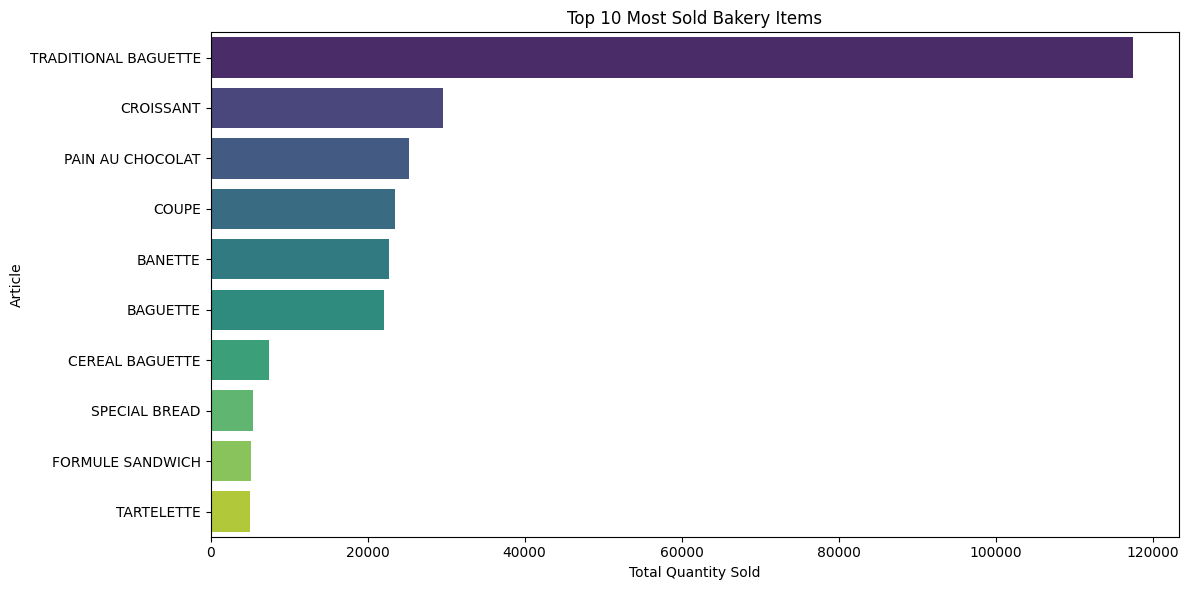

In [28]:
# Group by 'article' and sum the 'Quantity'
product_sales = data.groupby('article')['Quantity'].sum().sort_values(ascending=False)

# Select the top 10 most sold items
top_n = 10
top_products = product_sales.head(top_n).reset_index()

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='article', palette='viridis')
plt.title(f'Top {top_n} Most Sold Bakery Items')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Article')
plt.tight_layout()
plt.show()

time_period
morning      254981.0
noon          61009.0
evening       31206.0
afternoon     12792.0
Name: Quantity, dtype: float64


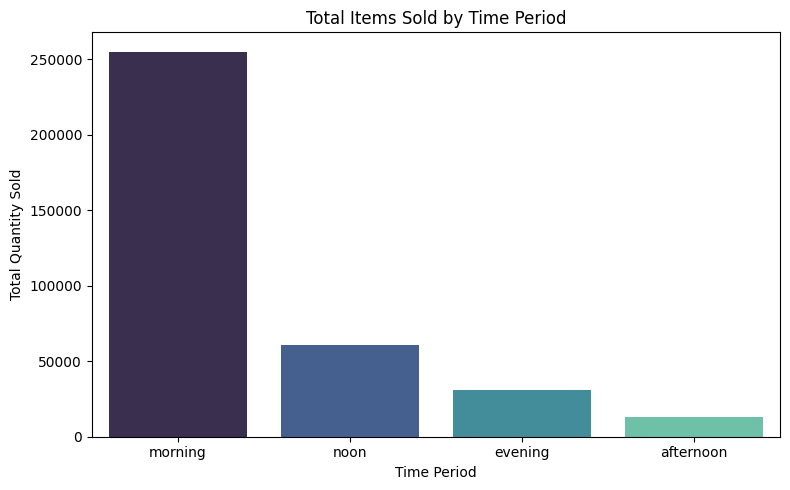

In [29]:
# Group by 'time_period' and sum the 'Quantity'
time_period_sales = data.groupby('time_period')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(time_period_sales)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=time_period_sales.index, y=time_period_sales.values, palette='mako')
plt.title('Total Items Sold by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

day
Sunday       83413.0
Saturday     61702.0
Friday       48115.0
Monday       47715.0
Thursday     44924.0
Tuesday      42491.0
Wednesday    31628.0
Name: Quantity, dtype: float64


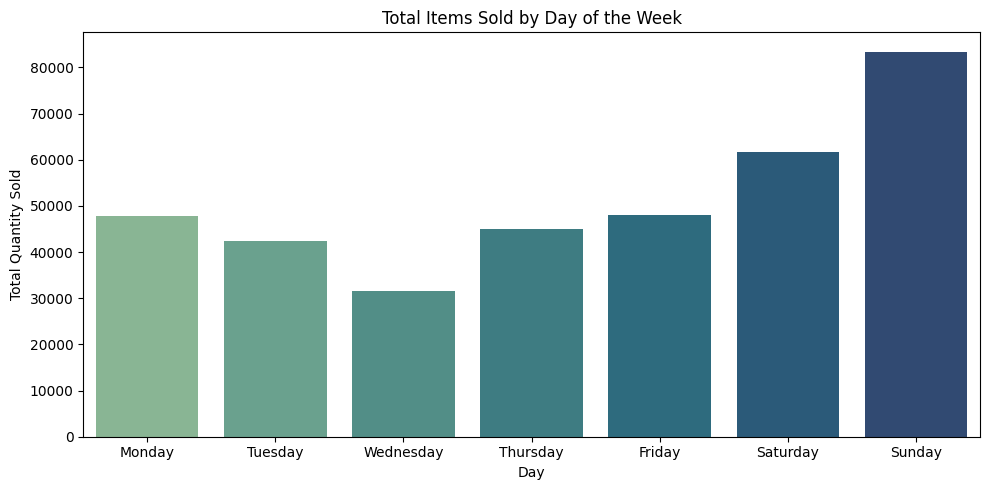

In [30]:
# Group by 'day' and sum the 'Quantity'
day_sales = data.groupby('day')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(day_sales)

# To ensure days are in calendar order, you can use:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(days_order)

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=day_sales.index, y=day_sales.values, palette='crest')
plt.title('Total Items Sold by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

month
August       66873.0
July         57529.0
May          37112.0
June         32028.0
April        31479.0
September    28709.0
March        25583.0
February     23365.0
January      18428.0
October      14971.0
December     12138.0
November     11773.0
Name: Quantity, dtype: float64


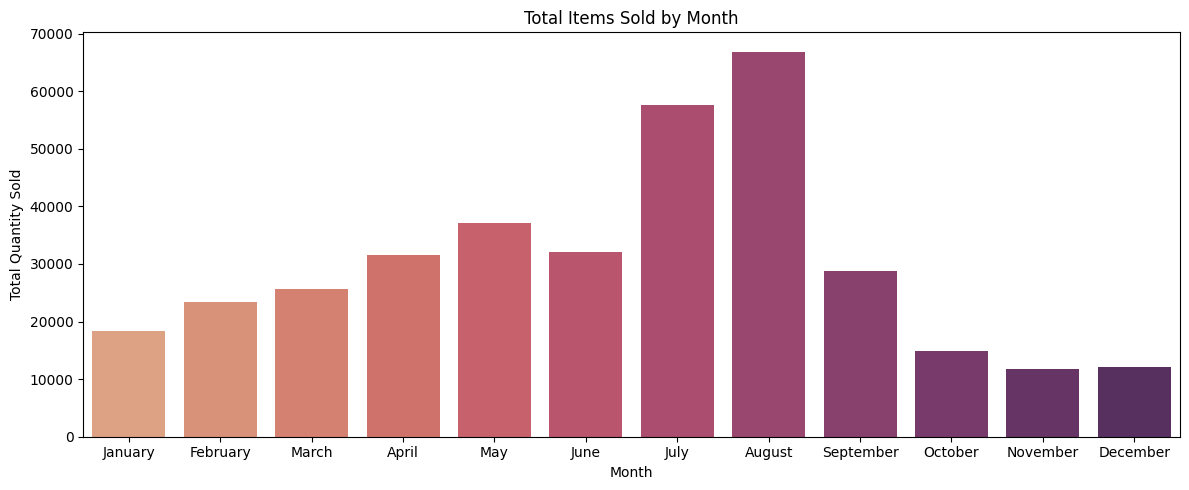

In [31]:
# Ensure 'month' column is in the correct order
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
data['month'] = pd.Categorical(data['month'], categories=months_order, ordered=True)

# Group by 'month' and sum the 'Quantity'
month_sales = data.groupby('month')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(month_sales)

# Plot using seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x=month_sales.index, y=month_sales.values, palette='flare')
plt.title('Total Items Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()